# Projet Diagnostic

## Chargement et brève analyse descriptive

Importation des librairies nécessaires

In [1]:
import pandas as pd
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb 
import sys
import numpy as np
from sklearn.model_selection import train_test_split

Chargement des données :

In [2]:
ot_odr_filename = os.path.join(".", "OT_ODR.csv.bz2")
ot_odr_df = pd.read_csv(ot_odr_filename,
                        compression="bz2",
                        sep=";")

equipements_filename = os.path.join(".", 'EQUIPEMENTS.csv')
equipements_df = pd.read_csv(equipements_filename,
                             sep=";")

Analyse des modalités des variables de signalement :

In [3]:
var_sig = ["SIG_ORGANE", "SIG_CONTEXTE", "SIG_OBS"]
ot_odr_df[var_sig].describe()

,SIG_ORGANE,SIG_CONTEXTE,SIG_OBS
count,506558,506558,506558
unique,116,5509,59
top,ECLAIRAGE FEUX EXTERIEURS,ARRIERE,NE FONCTIONNE PAS
freq,189559,32095,150740


Analyse des modalités des variables type travail et OdR :

In [4]:
var_odr = ["TYPE_TRAVAIL", "ODR_LIBELLE"]
ot_odr_df[var_odr].describe()

,TYPE_TRAVAIL,ODR_LIBELLE
count,506558,506558
unique,12,1410
top,ELECTRICITE,REMPLACEMENT D'UNE LAMPE DE CODE / PHARE
freq,258129,40302


In [5]:
ot_odr_df["TYPE_TRAVAIL"].unique()

array(['CARROSSERIE', 'ELECTRICITE', 'MECANIQUE', 'MISE AU POINT',
       'EQUIPEMENT EMBARQUE', 'EXTINCTEUR', 'STATION SERVICE', 'ROUE',
       'CLIMATISATION', 'BATTERIE', 'DIVERS', 'CONTROLE'], dtype=object)

## Préparation des données

On change le type des variables catégorielles avec la méthode `.astype('category')` :

In [6]:
var_cat = ['ODR_LIBELLE', 'TYPE_TRAVAIL',
           'SYSTEM_N1', 'SYSTEM_N2', 'SYSTEM_N3', 
           'SIG_ORGANE', 'SIG_CONTEXTE', 'SIG_OBS', 'LIGNE']
for var in var_cat:
    ot_odr_df[var] = ot_odr_df[var].astype('category')

ot_odr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506558 entries, 0 to 506557
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   OT_ID          506558 non-null  object  
 1   ODR_ID         506558 non-null  object  
 2   ODR_LIBELLE    506558 non-null  category
 3   TYPE_TRAVAIL   506558 non-null  category
 4   DUREE_TRAVAIL  506558 non-null  float64 
 5   SYSTEM_N1      506558 non-null  category
 6   SYSTEM_N2      506558 non-null  category
 7   SYSTEM_N3      506558 non-null  category
 8   EQU_ID         506558 non-null  object  
 9   DATE_OT        506558 non-null  object  
 10  KILOMETRAGE    506557 non-null  float64 
 11  SIG_ORGANE     506558 non-null  category
 12  SIG_CONTEXTE   506558 non-null  category
 13  SIG_OBS        506558 non-null  category
 14  LIGNE          506558 non-null  category
dtypes: category(9), float64(2), object(4)
memory usage: 29.7+ MB


In [7]:
var_cat = ['MODELE', 'CONSTRUCTEUR', 'MOTEUR']
for var in var_cat:
    equipements_df[var] = equipements_df[var].astype('category')

equipements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   EQU_ID        4887 non-null   object  
 1   MODELE        4887 non-null   category
 2   CONSTRUCTEUR  4887 non-null   category
 3   MOTEUR        4887 non-null   category
dtypes: category(3), object(1)
memory usage: 58.4+ KB


In [8]:
joined_df = ot_odr_df.set_index('EQU_ID').join(equipements_df.set_index('EQU_ID'))

In [9]:
joined_df = joined_df.reset_index(drop="True")
joined_df

,OT_ID,ODR_ID,ODR_LIBELLE,TYPE_TRAVAIL,DUREE_TRAVAIL,SYSTEM_N1,SYSTEM_N2,SYSTEM_N3,DATE_OT,KILOMETRAGE,SIG_ORGANE,SIG_CONTEXTE,SIG_OBS,LIGNE,MODELE,CONSTRUCTEUR,MOTEUR
0,OT000002306,OM000002463,REMPLACEMENT D'UN REGLEUR DE DEBIT DE PORTE,ELECTRICITE,0.50,EQUIPEMENT DE CARROSSERIE,PORTE,COMMANDE PORTE,2012-06-29 22:41:19,324206.608000,PORTE,PLATE FORME,FONCTIONNE MAL,L0385,MD037,C007,MT010
1,OT000005633,OM000006163,REMPLACEMENT DE L'ELECTROVANNE DE DEGIVRAGE,MECANIQUE,1.00,EQUIPEMENT CLIMATIQUE,CHAUFFAGE/DEGIVRAGE,ORGANE DE CHAUFFAGE/DEGIVRAGE,2013-03-05 18:22:19,349306.448000,DIRECTION,EN VIRAGE/A L'ARRET,A-COUPS,L0385,MD037,C007,MT010
2,OT000006231,OM000006857,REMPLACEMENT D'UN HABILLAGE INT DE BAIE,CARROSSERIE,0.25,EQUIPEMENT DE CARROSSERIE,AMENAGEMENT INT,HABILLAGE INT,2013-04-05 20:17:29,352589.208000,GLACE/BAIE,DROIT/ARRIERE,TAGUE,L0385,MD037,C007,MT010
3,OT000012829,OM000014475,REMPLACEMENT D'UN PORTILLON LAT,CARROSSERIE,0.41,EQUIPEMENT DE CARROSSERIE,ELEMENT CARROSSERIE EXT,CARROSSERIE LAT,2013-11-07 19:10:57,372248.368000,PANNEAU,GAUCHE/LATERAL/BAS,CASSE,L0385,MD037,C007,MT010
4,OT000013786,OM000015291,REMPLACEMENT D'UN ECLAIRAGE INT,ELECTRICITE,0.06,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION INT,2013-11-21 19:15:46,374007.544000,DEMANDE ARRET,BAS/TABLEAU DE BORD/DROIT,VOYANT HS,L0385,MD037,C007,MT010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506553,OT000390943,OM000486456,REMPLACEMENT DU CONCENTRATEUR PEAGE,EQUIPEMENT EMBARQUE,0.08,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,CONCENTRATEUR DE PEAGE,2019-07-02 21:15:31,923.702323,AVTT,AVANT/DROIT,FONCTIONNE MAL,L0077,MD032,C006,MT016
506554,OT000400206,OM000498614,REMPLACEMENT DE LA RADIO,EQUIPEMENT EMBARQUE,0.05,EQUIPEMENT EMBARQUE,AIDE A L'EXPLOITATION-MAINTENANCE,RADIO,2019-08-29 20:53:23,5418.005056,RADIO,POSTE CONDUITE,NE FONCTIONNE PAS,L0077,MD032,C006,MT016
506555,OT000400557,OM000499548,REMPLACEMENT D'UN FEU DE GABARIT,ELECTRICITE,0.04,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,2019-09-01 06:07:41,4337.170024,ECLAIRAGE FEUX EXTERIEURS,BAS/GAUCHE/LATERAL,CASSE,L0509,MD064,C007,MT024
506556,OT000405447,OM000505789,REMPLACEMENT D'UN PASSE SANS CONTACT,EQUIPEMENT EMBARQUE,0.06,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,PASSE SANS CONTACT,2019-09-26 19:52:05,2599.051019,AVTT,EN MONTEE,VOYANT HS,L0178,MD021,C011,MT051


In [10]:
joined_df_filtered = joined_df.select_dtypes(exclude=['object'])
joined_df_filtered

,ODR_LIBELLE,TYPE_TRAVAIL,DUREE_TRAVAIL,SYSTEM_N1,SYSTEM_N2,SYSTEM_N3,KILOMETRAGE,SIG_ORGANE,SIG_CONTEXTE,SIG_OBS,LIGNE,MODELE,CONSTRUCTEUR,MOTEUR
0,REMPLACEMENT D'UN REGLEUR DE DEBIT DE PORTE,ELECTRICITE,0.50,EQUIPEMENT DE CARROSSERIE,PORTE,COMMANDE PORTE,324206.608000,PORTE,PLATE FORME,FONCTIONNE MAL,L0385,MD037,C007,MT010
1,REMPLACEMENT DE L'ELECTROVANNE DE DEGIVRAGE,MECANIQUE,1.00,EQUIPEMENT CLIMATIQUE,CHAUFFAGE/DEGIVRAGE,ORGANE DE CHAUFFAGE/DEGIVRAGE,349306.448000,DIRECTION,EN VIRAGE/A L'ARRET,A-COUPS,L0385,MD037,C007,MT010
2,REMPLACEMENT D'UN HABILLAGE INT DE BAIE,CARROSSERIE,0.25,EQUIPEMENT DE CARROSSERIE,AMENAGEMENT INT,HABILLAGE INT,352589.208000,GLACE/BAIE,DROIT/ARRIERE,TAGUE,L0385,MD037,C007,MT010
3,REMPLACEMENT D'UN PORTILLON LAT,CARROSSERIE,0.41,EQUIPEMENT DE CARROSSERIE,ELEMENT CARROSSERIE EXT,CARROSSERIE LAT,372248.368000,PANNEAU,GAUCHE/LATERAL/BAS,CASSE,L0385,MD037,C007,MT010
4,REMPLACEMENT D'UN ECLAIRAGE INT,ELECTRICITE,0.06,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION INT,374007.544000,DEMANDE ARRET,BAS/TABLEAU DE BORD/DROIT,VOYANT HS,L0385,MD037,C007,MT010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506553,REMPLACEMENT DU CONCENTRATEUR PEAGE,EQUIPEMENT EMBARQUE,0.08,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,CONCENTRATEUR DE PEAGE,923.702323,AVTT,AVANT/DROIT,FONCTIONNE MAL,L0077,MD032,C006,MT016
506554,REMPLACEMENT DE LA RADIO,EQUIPEMENT EMBARQUE,0.05,EQUIPEMENT EMBARQUE,AIDE A L'EXPLOITATION-MAINTENANCE,RADIO,5418.005056,RADIO,POSTE CONDUITE,NE FONCTIONNE PAS,L0077,MD032,C006,MT016
506555,REMPLACEMENT D'UN FEU DE GABARIT,ELECTRICITE,0.04,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,4337.170024,ECLAIRAGE FEUX EXTERIEURS,BAS/GAUCHE/LATERAL,CASSE,L0509,MD064,C007,MT024
506556,REMPLACEMENT D'UN PASSE SANS CONTACT,EQUIPEMENT EMBARQUE,0.06,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,PASSE SANS CONTACT,2599.051019,AVTT,EN MONTEE,VOYANT HS,L0178,MD021,C011,MT051


In [11]:
joined_df_filtered = joined_df_filtered[joined_df_filtered['KILOMETRAGE'].notna()]
# Définir des intervalles personnalisés
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, float("inf")]
labels = ['C:0-50k', 'C:50k-100k', 'C:100k-150k', 'C:150k-200k', 'C:200k-250k', 'C:250k-300k', 'C:300k+']
#Genie n'aime pas quand une catégorie commence par un chiffre


# Définir une fonction pour attribuer des catégories
def categorize_kilometrage(km):
    if km < 50000:
        return 'C:0-50k'
    elif km < 100000:
        return 'C:50k-100k'
    elif km < 150000:
        return 'C:100k-150k'
    elif km < 200000:
        return 'C:150k-200k'
    elif km < 250000:
        return 'C:200k-250k'
    elif km < 300000:
        return 'C:250k-300k'
    elif km < 350000:
        return 'C:300k-350k'
    elif km < 400000:
        return 'C:350k-400k'
    elif km < 450000:
        return 'C:400k-450k'
    else:
        return 'C:450k+'

# Appliquer la fonction pour créer la nouvelle colonne
joined_df_filtered['KM_GROUP'] = joined_df_filtered['KILOMETRAGE'].apply(categorize_kilometrage).astype('category')

C:\Users\askel\AppData\Local\Temp\ipykernel_8204\2968634633.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df_filtered['KM_GROUP'] = joined_df_filtered['KILOMETRAGE'].apply(categorize_kilometrage).astype('category')


## Séparation des données en ensemble d'entrainement et de test

In [12]:
# Shuffle your dataset 
shuffle_df = joined_df_filtered.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(joined_df_filtered))

# Split your dataset 
train_data = shuffle_df[:train_size]
test_data = shuffle_df[train_size:]

## Création d'un premier modèle

Nous proposons de créer un modèle permettant d'expliquer la variable SYSTEM_N1 à partir de SIG_OBS.

On commence par créer les variables du réseau.

In [13]:
var_to_model = ["SYSTEM_N1", "SIG_ORGANE", "SIG_OBS", "KM_GROUP"]

var_bn = {}
for var in var_to_model:
    nb_values = len(joined_df_filtered[var].cat.categories)
    var_bn[var] = gum.LabelizedVariable(var, var, nb_values)
    

On renseigne les modalités des variables pour être fidèle à celles des données.

In [14]:
for var in var_bn:
    for i, modalite in enumerate(joined_df_filtered[var].cat.categories):
        var_bn[var].changeLabel(i, modalite)
    print(var_bn[var])

SYSTEM_N1:Labelized({DIVERS|EQUIPEMENT CHASSIS|EQUIPEMENT CLIMATIQUE|EQUIPEMENT DE CARROSSERIE|EQUIPEMENT DE FREINAGE|EQUIPEMENT DE MOTORISATION|EQUIPEMENT DE TRANSMISSION|EQUIPEMENT ELECTRIQUE|EQUIPEMENT EMBARQUE|EQUIPEMENT PNEUMATIQUE})
SIG_ORGANE:Labelized({ABS/ASR|ACCELERATEUR ELECTRIQUE|ACCOUDOIR|AERATEURS DE TOITURE|AIR|ALARME DISCRETE|ANNONCEUR SONORE|ANNONCEUR VISUEL|ARRET MOTEUR|ARRET URGENCE|ARTICULATION REMORQUE|AUTO-RADIO|AVTT|BAGUETTE|BARRE|BOITE VITESSES|BOITIER GESTION MOTEUR|BOITIER POLICE ELECTRONIQUE|BOUTON/ POUSSOIR/ INTERRUPTEUR|BRUITEUR|CAOU.JOINT|CARBURANT|CHAUFFAGE|CLIGNOTANTS/ DETRESSE|CLOCHE ECOLOGIQUE|COLMATAGE.F.AIR|COMBINE RADIO|COMMANDE A DISTANCE|COMMODO|COMPTAGE VOYAGEURS|COMPTEUR/ TACHYGRAPHE|DEGIVRAGE|DEMANDE ARRET|DEMARRAGE|DEPART AU PUPITRE PREPOINTAGE|DIRECTION|EAU|ECHAPPEMENT|ECLAIRAGE FEUX EXTERIEURS|ECLAIRAGE INTERIEUR|ESSUIE-GLACE|EXTINCTEUR|FEU ANTIBROUILLARD|FEU CLIGNOTANT|FEU GABARIT|FEU MARCHE AR|FEU STOP|FREIN A PIED|FREIN DE PARC|FREIN EXPL

Ensuite, on crée le réseau bayésien et on ajoute les variables sélectionnées.

In [15]:
bn = gum.BayesNet("modèle simple")

for var in var_bn.values():
    bn.add(var)

Pour finir, on fixe la structure.

In [16]:
bn.addArc("SYSTEM_N1", "SIG_OBS")
bn.addArc("SIG_ORGANE", "SYSTEM_N1")
bn.addArc("SYSTEM_N1", "KM_GROUP")

Nous pouvons utiliser temporairement un notebook Jupyter afin de vérifier graphiquement la structure et les LPC de notre modèle.

* Pas sur de ce qu'il faut faire ici. Y'a l'import de gnb a utiliser peut-être ? *

In [17]:
bn

(pyAgrum.BayesNet<double>@0000022B33F71500) BN{nodes: 4, arcs: 3, domainSize: 684400, dim: 1829, mem: 15Ko 368o}

Loi de probabilité de SIG_OBS, SIG_ORGANE, KM_GROUP :

In [18]:
bn.cpt("SIG_ORGANE")

(pyAgrum.Potential<double>@0000022B34099F00) 
  SIG_ORGANE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
ABS/ASR  |ACCELERAT|ACCOUDOIR|AERATEURS|AIR      |ALARME DI|ANNONCEUR|ANNONCEUR|ARRET MOT|ARRET URG|ARTICULAT|AUTO-RADI|AVTT     |BAGUETTE |BARRE    |BOITE VIT|BOITIER G|BOITIER P|BOUTON/ P|BRUITEUR |CAOU.JOIN|CARBURANT|CHAUFFAGE|CLIGNOTAN|CLOCHE EC|COLMATAGE|COMBINE R|COMMANDE |COMMODO  |COMPTAGE |COMPTEUR/|DEGIVRAGE|DEMANDE A|DEMARRAGE|DEPART AU|DIRECTION|EAU      |ECHAPPEME|ECLAIRAGE|ECLAIRAGE|ESSUIE-GL|EXTINCTEU|FEU ANTIB|FEU CLIGN|FEU GABAR|FEU MARCH|FEU STOP |FREIN A P|FREIN DE |FREIN EXP|GIROUETTE|GIROUETTE|GLACE/BAI|HABILLAGE|HAUT-PARL|HUILE DIR|HUILE MOT|INFORMATI|ISSUE SEC|KLAXON/GO|LAVE-GLAC|LUBRIMATI|LUNETTE-A|MANOMETRE|MARCHE AR|MARTEAU B|MICRO    |MOTEUR   |PANNEAU  |PAPIER BU|PARE-BRIS|PARE-CHOC|PARE-JAMB|PARE-SOLE|PEDALE AC|PEDALE DE|PILE BTSA|POIGNEE  |PORTE    |PORTILLON|PUBLICITE|PUPITRE.I|PURGE POR|RADIO    |RALENTI  |RALENTISS|RAMPE UFR|RETROVISE|ROUE/PNEU|S A E I V|SECURITE |SELECTEUR|SELECTEUR|SELF-SERV|SIEGE MAC|SIEGE VOY|SIGNALEME|SOUFFLET |SUSPENSIO|SYSTEME D|TACHYGRAP|TEMOIN DI|TIROIR CA|TOIT     |TRAPPE GA|VENTILATI|VIDEO POR|VIDEO-SUR|VITESSE  |VOITURE  |VOLANT   |VOYAGEUR |VOYANT AL|VOYANT AL|VOYANT DE|VOYANT IT|
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 

In [19]:
bn.cpt("KM_GROUP")

(pyAgrum.Potential<double>@0000022B3409A160) 
      ||  KM_GROUP                                                                                         |
SYSTEM||C:0-50k  |C:100k-15|C:150k-20|C:200k-25|C:250k-30|C:300k-35|C:350k-40|C:400k-45|C:450k+  |C:50k-100|
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
DIVERS|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |

In [20]:
bn.cpt("SIG_OBS")

(pyAgrum.Potential<double>@0000022B3409A140) 
      ||  SIG_OBS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
SYSTEM||A-COUPS  |ABSENT   |ALLUME   |ARRACHE  |ASPIRER  |BALANCE  |BLESSE   |BLOQUE   |BROUTE   |BRUTAL   |BRUYANT  |CALE     |CASSE    |CLAQUE   |CLIGNOTE |CREVE    |DEBOITE  |DECLENCHE|DEGONFLE |DELOCALIS|DEREGLE  |DESSERRE |DUR      |ENFONCE  |FAUX CONT|FENDU    |FERME MAL|FONCTIONN|FUITE    |FUME/CHAU|INCOMPLET|INSUFFISA|INTERMITT|INTERRUPT|JEU      |LACERE   |MANQUE   |MAUVAIS  |N'EMET PA|N'ENCRE P|NE FONCTI|NE TIRE P|ODEUR    |OUVRE MAL|PATINE   |RAYE     |REFUSE TI|SALE     |SECOUSSE |TAGUE    |TANGUE   |TEMOIN OU|TIRE A DR|TIRE A GA|TORDU    |USE/VIDE |VIBRE    |VOYANT AL|VOYANT HS|
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
DIVERS|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
EQUIPE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0

Loi de probabilité de SYSTEM_N1 | SIG_ORGANE :

In [21]:
bn.cpt("SYSTEM_N1")

(pyAgrum.Potential<double>@0000022B3409A2E0) 
      ||  SYSTEM_N1                                                                                        |
SIG_OR||DIVERS   |EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
ABS/AS|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
ACCELE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
ACCOUD|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
AERATE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
AIR   || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
ALARME|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
[...104 more line(s) ...]
VOLANT|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
VOYAGE|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
VOYANT|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
VOYANT|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
VOYANT|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
VOYANT|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |

On remarque naturellement que les LPC ne contiennent pour l'instant que des zéros…

## Apprentissage des LPC

Pour apprendre les paramètres des LPC à partir des données, vous pouvez utiliser la classe gum.BNLearner et en particulier la méthode fitParameters:

In [22]:
learner = gum.BNLearner(joined_df_filtered[var_to_model])

In [23]:
learner

(pyAgrum.BNLearner<double>@0000022B34804450) Filename       : C:\Users\askel\AppData\Local\Temp\tmphbsm7cz6.csv
Size           : (506557,4)
Variables      : SYSTEM_N1[10], SIG_ORGANE[116], SIG_OBS[59], KM_GROUP[10]
Induced types  : True
Missing values : False
Algorithm      : MIIC
Score          : BDeu  (Not used for constraint-based algorithms)
Correction     : MDL  (Not used for score-based algorithms)
Prior          : -

In [24]:

learner.fitParameters(bn)

(pyAgrum.BNLearner<double>@0000022B34804450) Filename       : C:\Users\askel\AppData\Local\Temp\tmphbsm7cz6.csv
Size           : (506557,4)
Variables      : SYSTEM_N1[10], SIG_ORGANE[116], SIG_OBS[59], KM_GROUP[10]
Induced types  : True
Missing values : False
Algorithm      : MIIC
Score          : BDeu  (Not used for constraint-based algorithms)
Correction     : MDL  (Not used for score-based algorithms)
Prior          : -

Après apprentissage, nous obtenons les LPC suivantes.

Loi de probabilité de SYSTEM_N1 | SIG_ORGANE :

In [25]:
bn.cpt("SYSTEM_N1")

(pyAgrum.Potential<double>@0000022B3409A2E0) 
      ||  SYSTEM_N1                                                                                        |
SIG_OR||DIVERS   |EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
ABS/AS|| 0.0000  | 0.0351  | 0.0008  | 0.0208  | 0.7526  | 0.0583  | 0.0048  | 0.1109  | 0.0024  | 0.0144  |
ACCELE|| 0.0000  | 0.0042  | 0.0042  | 0.0336  | 0.0294  | 0.6891  | 0.0714  | 0.1345  | 0.0000  | 0.0336  |
ACCOUD|| 0.0000  | 0.0000  | 0.0000  | 1.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
AERATE|| 0.0014  | 0.0014  | 0.8715  | 0.0198  | 0.0000  | 0.0028  | 0.0000  | 0.0960  | 0.0028  | 0.0042  |
AIR   || 0.0000  | 0.0607  | 0.0071  | 0.1921  | 0.1732  | 0.0578  | 0.0028  | 0.0304  | 0.0009  | 0.4750  |
ALARME|| 0.0000  | 0.0000  | 0.0018  | 0.0181  | 0.0018  | 0.0018  | 0.0000  | 0.0399  | 0.9348  | 0.0018  |
[...104 more line(s) ...]
VOLANT|| 0.0000  | 0.5361  | 0.0041  | 0.3020  | 0.0340  | 0.0122  | 0.0068  | 0.0503  | 0.0000  | 0.0544  |
VOYAGE|| 0.0000  | 0.0000  | 0.0000  | 1.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
VOYANT|| 0.0000  | 0.0538  | 0.0128  | 0.0778  | 0.0733  | 0.4172  | 0.0228  | 0.2242  | 0.0021  | 0.1160  |
VOYANT|| 0.0001  | 0.0201  | 0.0269  | 0.0266  | 0.1365  | 0.3728  | 0.0046  | 0.3897  | 0.0017  | 0.0210  |
VOYANT|| 0.0000  | 0.0000  | 0.0143  | 0.0143  | 0.0029  | 0.2157  | 0.0014  | 0.7471  | 0.0000  | 0.0043  |
VOYANT|| 0.0000  | 0.0116  | 0.0023  | 0.0419  | 0.0186  | 0.3930  | 0.0023  | 0.5093  | 0.0023  | 0.0186  |

Loi de probabilité de SIG_OBS | SYSTEM_N1 :

In [26]:
bn.cpt("SIG_OBS")

(pyAgrum.Potential<double>@0000022B3409A140) 
      ||  SIG_OBS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
SYSTEM||A-COUPS  |ABSENT   |ALLUME   |ARRACHE  |ASPIRER  |BALANCE  |BLESSE   |BLOQUE   |BROUTE   |BRUTAL   |BRUYANT  |CALE     |CASSE    |CLAQUE   |CLIGNOTE |CREVE    |DEBOITE  |DECLENCHE|DEGONFLE |DELOCALIS|DEREGLE  |DESSERRE |DUR      |ENFONCE  |FAUX CONT|FENDU    |FERME MAL|FONCTIONN|FUITE    |FUME/CHAU|INCOMPLET|INSUFFISA|INTERMITT|INTERRUPT|JEU      |LACERE   |MANQUE   |MAUVAIS  |N'EMET PA|N'ENCRE P|NE FONCTI|NE TIRE P|ODEUR    |OUVRE MAL|PATINE   |RAYE     |REFUSE TI|SALE     |SECOUSSE |TAGUE    |TANGUE   |TEMOIN OU|TIRE A DR|TIRE A GA|TORDU    |USE/VIDE |VIBRE    |VOYANT AL|VOYANT HS|
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
DIVERS|| 0.0213  | 0.0000  | 0.0000  | 0.0213  | 0.0000  | 0.0000  | 0.0000  | 0.0213  | 0.0000  | 0.0000  | 0.2979  | 0.0000  | 0.0213  | 0.0213  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0213  | 0.0000  | 0.0000  | 0.0000  | 0.2766  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.1277  | 0.0000  | 0.0213  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0638  | 0.0000  | 0.0000  | 0.0000  | 0.0213  | 0.0638  | 0.0000  |
EQUIPE|| 0.0371  | 0.0029  | 0.0001  | 0.0067  | 0.0000  | 0.0344  | 0.0107  | 0.0750  | 0.0000  | 0.0000  | 0.1424  | 0.0006  | 0.0485  | 0.0604  | 0.0078  | 0.0142  | 0.0116  | 0.0001  | 0.1296  | 0.0000  | 0.0017  | 0.0059  | 0.0650  | 0.0119  | 0.0001  | 0.0001  | 0.0004  | 0.0822  | 0.0667  | 0.0054  | 0.0003  | 0.0011  | 0.0082  | 0.0014  | 0.0002  | 0.0038  | 0.0042  | 0.0000  | 0.0000  | 0.0000  | 0.0733  | 0.0007  | 0.0021  | 0.0001  | 0.0004  | 0.0088  | 0.0000  | 0.0000  | 0.0000  | 0.0023  | 0.0002  | 0.0006  | 0.0032  | 0.0017  | 0.0002  | 0.0085  | 0.0105  | 0.0451  | 0.0017  |
EQUIPE|| 0.0009  | 0.1313  | 0.0000  | 0.0001  | 0.0000  | 0.0003  | 0.0000  | 0.0382  | 0.0000  | 0.0000  | 0.0443  | 0.0001  | 0.0677  | 0.0006  | 0.0011  | 0.0001  | 0.0046  | 0.0000  | 0.0004  | 0.0000  | 0.0000  | 0.0005  | 0.0004  | 0.0010  | 0.0000  | 0.0000  | 0.0001  | 0.1216  | 0.0967  | 0.0155  | 0.0001  | 0.1347  | 0.0050  | 0.0196  | 0.0000  | 0.0003  | 0.0104  | 0.0000  | 0.0000  | 0.0000  | 0.2411  | 0.0003  | 0.0178  | 0.0000  | 0.0000  | 0.0010  | 0.0000  | 0.0009  | 0.0000  | 0.0000  | 0.0000  | 0.0001  | 0.0001  | 0.0001  | 0.0000  | 0.0000  | 0.0004  | 0.0411  | 0.0016  |
EQUIPE|| 0.0010  | 0.0279  | 0.0000  | 0.0247  | 0.0003  | 0.0013  | 0.0001  | 0.0596  | 0.0000  | 0.0002  | 0.0116  | 0.0001  | 0.3580  | 0.0103  | 0.0018  | 0.0001  | 0.0675  | 0.0000  | 0.0018  | 0.0000  | 0.0007  | 0.0229  | 0.0023  | 0.0505  | 0.0001  | 0.0007  | 0.0034  | 0.1064  | 0.0308  | 0.0008  | 0.0012  | 0.0094  | 0.0026  | 0.0139  | 0.0000  | 0

Loi de probabilité de SIG_ORGANE :

In [27]:
bn.cpt("SIG_ORGANE")

(pyAgrum.Potential<double>@0000022B34099F00) 
  SIG_ORGANE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
ABS/ASR  |ACCELERAT|ACCOUDOIR|AERATEURS|AIR      |ALARME DI|ANNONCEUR|ANNONCEUR|ARRET MOT|ARRET URG|ARTICULAT|AUTO-RADI|AVTT     |BAGUETTE |BARRE    |BOITE VIT|BOITIER G|BOITIER P|BOUTON/ P|BRUITEUR |CAOU.JOIN|CARBURANT|CHAUFFAGE|CLIGNOTAN|CLOCHE EC|COLMATAGE|COMBINE R|COMMANDE |COMMODO  |COMPTAGE |COMPTEUR/|DEGIVRAGE|DEMANDE A|DEMARRAGE|DEPART AU|DIRECTION|EAU      |ECHAPPEME|ECLAIRAGE|ECLAIRAGE|ESSUIE-GL|EXTINCTEU|FEU ANTIB|FEU CLIGN|FEU GABAR|FEU MARCH|FEU STOP |FREIN A P|FREIN DE |FREIN EXP|GIROUETTE|GIROUETTE|GLACE/BAI|HABILLAGE|HAUT-PARL|HUILE DIR|HUILE MOT|INFORMATI|ISSUE SEC|KLAXON/GO|LAVE-GLAC|LUBRIMATI|LUNETTE-A|MANOMETRE|MARCHE AR|MARTEAU B|MICRO    |MOTEUR   |PANNEAU  |PAPIER BU|PARE-BRIS|PARE-CHOC|PARE-JAMB|PARE-SOLE|PEDALE AC|PEDALE DE|PILE BTSA|POIGNEE  |PORTE    |PORTILLON|PUBLICITE|PUPITRE.I|PURGE POR|RADIO    |RALENTI  |RALENTISS|RAMPE UFR|RETROVISE|ROUE/PNEU|S A E I V|SECURITE |SELECTEUR|SELECTEUR|SELF-SERV|SIEGE MAC|SIEGE VOY|SIGNALEME|SOUFFLET |SUSPENSIO|SYSTEME D|TACHYGRAP|TEMOIN DI|TIROIR CA|TOIT     |TRAPPE GA|VENTILATI|VIDEO POR|VIDEO-SUR|VITESSE  |VOITURE  |VOLANT   |VOYAGEUR |VOYANT AL|VOYANT AL|VOYANT DE|VOYANT IT|
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.0025  | 0.0005  | 0.0000  | 0.0014  | 0.0224  | 0.0011  | 0.0016  | 0.0009  | 0.0006  | 0.0001  | 0.0001  | 0.0000  | 0.0203  | 0.0016  | 0.0004  | 0.0021  | 0.0001  | 0.0002  | 0.0139  | 0.0003  | 0.0028  | 0.0030  | 0.0187  | 0.0770  | 0.0000  | 0.0000  | 0.0000  | 0.0004  | 0.0005  | 0.0003  | 0.0004  | 0.0007  | 0.0136  | 0.0011  | 0.0000  | 0.0025  | 0.0088  | 0.0010  | 0.3742  | 0.0312  | 0.0100  | 0.0006  | 0.0003  | 0.0020  | 0.0020  | 0.0002  | 0.0051  | 

Loi de probabilité de KM_GROUP | SYSTEM_N1 :

In [28]:
bn.cpt("KM_GROUP")

(pyAgrum.Potential<double>@0000022B3409A160) 
      ||  KM_GROUP                                                                                         |
SYSTEM||C:0-50k  |C:100k-15|C:150k-20|C:200k-25|C:250k-30|C:300k-35|C:350k-40|C:400k-45|C:450k+  |C:50k-100|
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
DIVERS|| 0.0213  | 0.2766  | 0.1489  | 0.0638  | 0.0638  | 0.0213  | 0.0638  | 0.0638  | 0.1489  | 0.1277  |
EQUIPE|| 0.0246  | 0.0861  | 0.1172  | 0.1073  | 0.1417  | 0.1505  | 0.1207  | 0.0916  | 0.1140  | 0.0463  |
EQUIPE|| 0.0425  | 0.0777  | 0.1035  | 0.1224  | 0.1421  | 0.1457  | 0.1172  | 0.0816  | 0.1064  | 0.0609  |
EQUIPE|| 0.0681  | 0.1020  | 0.1165  | 0.1205  | 0.1368  | 0.1308  | 0.0997  | 0.0643  | 0.0716  | 0.0897  |
EQUIPE|| 0.0211  | 0.0737  | 0.1016  | 0.1205  | 0.1537  | 0.1535  | 0.1273  | 0.0950  | 0.1101  | 0.0436  |
EQUIPE|| 0.0352  | 0.0988  | 0.1079  | 0.1147  | 0.1317  | 0.1437  | 0.1157  | 0.0847  | 0.0998  | 0.0679  |
EQUIPE|| 0.0269  | 0.0712  | 0.0886  | 0.1474  | 0.1380  | 0.1583  | 0.1126  | 0.0988  | 0.1038  | 0.0545  |
EQUIPE|| 0.0528  | 0.1029  | 0.1241  | 0.1337  | 0.1406  | 0.1254  | 0.0956  | 0.0645  | 0.0768  | 0.0835  |
EQUIPE|| 0.1051  | 0.0976  | 0.1083  | 0.1071  | 0.1336  | 0.1242  | 0.0918  | 0.0619  | 0.0783  | 0.0920  |
EQUIPE|| 0.0176  | 0.0412  | 0.0568  | 0.1060  | 0.1391  | 0.1830  | 0.1734  | 0.1260  | 0.1259  | 0.0310  |

## Prédictions

À ce stade, vous pouvez reprendre la fonction predict que nous avons utilisée dans ce TD pour réaliser des prédictions d'une variable cible à partir de données. Chaque ligne des données fournies est utilisée comme évidence (conditionnement) pour calculer la loi de la variable cible sachant les données observées.

In [29]:
def predict(bn, data, var_target, show_progress=False):
    """
    This function is used to predict the posterior probability of a target variable from observations  
    using a bayesian network model. 

    Inputs:
    - =bn=: the predictive model given as a =pyAgrum.BayesNet= object
    - =data=: the data containing the observations used to predict the target variable 
    as a =pandas.DataFrame= object
    - =var_target=: the name of the target variable as a =str= object

    Returns:
    - a =DataFrame= containing the posterior probability distribution of the target 
    variable given each observation in =data=.
    """
    # Initialize the inference engine
    inf_bn = gum.LazyPropagation(bn)
    inf_bn.setTargets({var_target})
    nb_data = len(data)
    target_size = bn.variable(var_target).domainSize()
    target_dom = np.array([bn.variable(var_target).label(i)
                           for i in range(target_size)])
    data_records = data.to_dict("records")
    post_prob = np.zeros((nb_data, target_size))
    for i in range(nb_data):
        # Set the evidence
        inf_bn.setEvidence(data_records[i])
        # Run inference
        inf_bn.makeInference()
        # Compute posterior probability of target variable
        post_prob[i, :] = inf_bn.posterior(var_target).toarray()
        # Erase evidence
        inf_bn.eraseAllEvidence()
        if show_progress:
            sys.stdout.write("predict progress: {0:3.0%}\r".format(i/nb_data))

    post_prob_df = pd.DataFrame(post_prob,
                                index=data.index,
                                columns=bn.variable(var_target).labels())
    post_prob_df.columns.name = var_target
    return post_prob_df

In [38]:
pred_prob = predict(bn,
                    data=test_data[["SIG_OBS", "SIG_ORGANE", "KM_GROUP"]], 
                    var_target="SYSTEM_N1",
                    show_progress=True)

pred_var = pred_prob.idxmax(axis=1).rename("pred")

On finit par évaluer le taux de prédictions du modèle par rapport aux données observées.

In [39]:
(test_data["SYSTEM_N1"] == pred_var).mean()

0.8688210675931776

Et la matrice de confusion associée :

In [41]:
confusion_matrix = pd.crosstab(test_data["SYSTEM_N1"], pred_var)
confusion_matrix

pred,EQUIPEMENT CHASSIS,EQUIPEMENT CLIMATIQUE,EQUIPEMENT DE CARROSSERIE,EQUIPEMENT DE FREINAGE,EQUIPEMENT DE MOTORISATION,EQUIPEMENT DE TRANSMISSION,EQUIPEMENT ELECTRIQUE,EQUIPEMENT EMBARQUE,EQUIPEMENT PNEUMATIQUE
SYSTEM_N1,,,,,,,,,
DIVERS,5,0,1,0,1,0,0,0,0
EQUIPEMENT CHASSIS,2396,8,282,59,175,4,83,0,146
EQUIPEMENT CLIMATIQUE,16,2294,114,4,331,0,34,4,22
EQUIPEMENT DE CARROSSERIE,151,60,22404,78,249,12,1155,301,614
EQUIPEMENT DE FREINAGE,225,9,108,845,613,8,56,3,489
EQUIPEMENT DE MOTORISATION,119,142,136,55,3647,54,108,2,166
EQUIPEMENT DE TRANSMISSION,27,2,17,8,82,119,22,1,6
EQUIPEMENT ELECTRIQUE,163,166,3227,206,1844,63,51173,211,99
EQUIPEMENT EMBARQUE,4,1,77,2,18,0,57,3945,1


## Précision par classe

In [45]:
confusion_matrix_with_divers = pd.concat([confusion_matrix, pd.DataFrame({'DIVERS': 0}, index=confusion_matrix.index)], axis=1)
precision_per_class = confusion_matrix_with_divers.apply(lambda x: x[x.name] / x.sum(), axis=1)
precision_per_class_sorted = precision_per_class.sort_values(ascending=False)
precision_per_class_sorted

SYSTEM_N1
EQUIPEMENT EMBARQUE           0.961023
EQUIPEMENT ELECTRIQUE         0.895384
EQUIPEMENT DE CARROSSERIE     0.895301
EQUIPEMENT DE MOTORISATION    0.823436
EQUIPEMENT CLIMATIQUE         0.813764
EQUIPEMENT CHASSIS            0.759911
EQUIPEMENT PNEUMATIQUE        0.604639
EQUIPEMENT DE TRANSMISSION    0.419014
EQUIPEMENT DE FREINAGE        0.358659
DIVERS                        0.000000
dtype: float64

## Sensibilité et spécificité

In [48]:
# Initialiser des listes pour stocker les sensibilités et les spécificités de chaque classe
sensitivities = []
specificities = []

# Itérer à travers chaque classe dans la matrice de confusion
for classe in confusion_matrix_with_divers.index:
    # Récupération des valeurs pour calculer la sensibilité et la spécificité
    true_positives = confusion_matrix_with_divers.loc[classe, classe]
    false_negatives = confusion_matrix_with_divers.loc[classe].sum() - true_positives
    false_positives = confusion_matrix_with_divers[classe].sum() - true_positives
    true_negatives = confusion_matrix_with_divers.sum().sum() - true_positives - false_negatives - false_positives

    # Calcul de la sensibilité (taux de vrais positifs) et de la spécificité (taux de vrais négatifs)
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    
    # Ajouter les sensibilités et les spécificités à leurs listes respectives
    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Calculer la moyenne de chaque classe
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_specificity = sum(specificities) / len(specificities)

print("Moyenne des sensibilités (Taux de vrais positifs) :", mean_sensitivity)
print("Moyenne des spécificités (Taux de vrais négatifs) :", mean_specificity)


Moyenne des sensibilités (Taux de vrais positifs) : 0.6531131539209987
Moyenne des spécificités (Taux de vrais négatifs) : 0.9833261715253994


## Courbe ROC et l'AUC pour EQUIPEMENT EMBARQUE

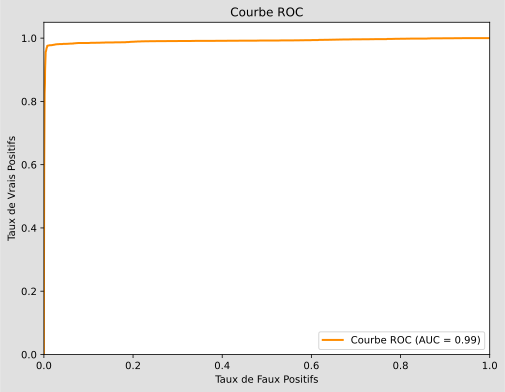

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = pred_prob["EQUIPEMENT EMBARQUE"]

# Transformer les vraies valeurs en un format binaire
# où 1 représente la classe positive et 0 toutes les autres classes
y_true_binary = (test_data["SYSTEM_N1"] == "EQUIPEMENT EMBARQUE").astype(int)

# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)

# Visualiser la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


## Courbe ROC et l'AUC pour EQUIPEMENT DE FREINAGE

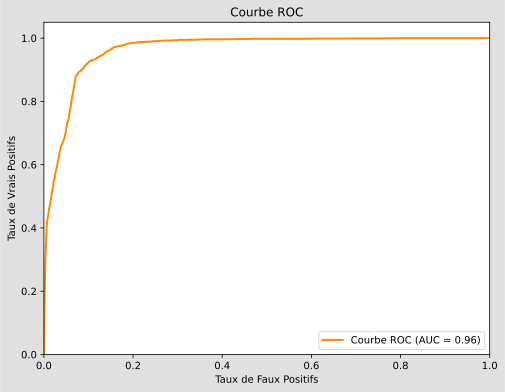

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = pred_prob["EQUIPEMENT DE FREINAGE"]

# Transformer les vraies valeurs en un format binaire
# où 1 représente la classe positive et 0 toutes les autres classes
y_true_binary = (test_data["SYSTEM_N1"] == "EQUIPEMENT DE FREINAGE").astype(int)

# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)

# Visualiser la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()
